# Paper Figures

In [1]:
# set python to pick up local directory
from pathlib import Path
import sys
import os
path_root = Path(os.getcwd()).parents[0]
sys.path.append(str(path_root))
sys.path.append(str(Path(os.getcwd()).parents[1]))

%reload_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('always', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("ticks")
sns.set_context("paper", rc={
    # 'font.size': 11,
    # "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
})

plt.rcParams.update({
    'font.size': 12,
    "axes.titlesize":12,
    "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
    # 'text.latex.preamble': r'\usepackage{amsfonts}; \usepackage{times}'
})

## Kernel Approximation

In [4]:
D_df = pd.read_csv('../kernel/D.csv')
R_df = pd.read_csv('../kernel/R.csv')

Rs_plot = R_df.drop(R_df[R_df["method"] == "srf"].index).reset_index(drop=True)
Rs_plot["R"] = Rs_plot["R"] / 1000
Ds_plot = D_df.drop(D_df[D_df["method"] == "srf"].index).reset_index(drop=True)

ka_names = {
    "mc": "MC",
    "qmc": "QMC",
    "orf": "ORF",
    "nys": "NYS",
    "msrf": "SVGD"
}

Rs_plot["method"] = Rs_plot["method"].map(ka_names)
Ds_plot["method"] = Ds_plot["method"].map(ka_names)


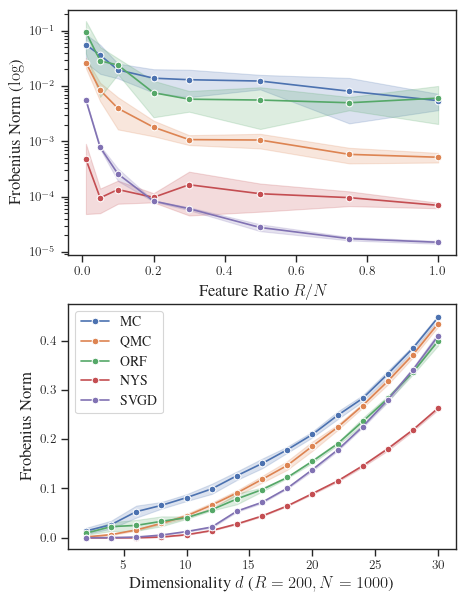

In [131]:
fig, ax = plt.subplots(2, 1, figsize=(5, 7))

sns.lineplot(data=Rs_plot, x="R", y="error", hue="method", errorbar="sd", marker="o", ax=ax[0])
ax[0].set(yscale="log", xlabel="Feature Ratio $R / N$", ylabel="Frobenius Norm ($\log$)")
ax[0].legend(loc='upper right', fontsize=9).remove()

sns.lineplot(data=Ds_plot, x="d", y="error", hue="method", errorbar="sd", marker="o", ax=ax[1])
ax[1].set(xlabel="Dimensionality $d$ ($R = 200, N=1000$)", ylabel="Frobenius Norm")
ax[1].legend(loc='upper left', fontsize=10)

fig.savefig("kernel.pdf", format="pdf", bbox_inches="tight", dpi=300)


## UCI Table

In [3]:
wine = pd.read_csv('../wine/results_cr.csv')
wine['dataset'] = 'wine'
concrete = pd.read_csv('../concrete/results_cr.csv')
concrete['dataset'] = 'concrete'
airfoil = pd.read_csv('../airfoil/results_cr.csv')
airfoil['dataset'] = 'airfoil'
energy = pd.read_csv('../energy/results_cr.csv')
energy['dataset'] = 'energy'

In [4]:
results = pd.concat([wine, concrete, airfoil, energy])
results["rmse"] = np.sqrt(results["mse"])

# Define the desired order of the models
model_order = ['svgp', 'rff_rbf', 'rff', 'qrff', 'srf', 'mix']

# Convert the "model" column to a Categorical data type with the desired order
results['model'] = pd.Categorical(results['model'], categories=model_order, ordered=True)

names = {
    "rff": "SSGP",
    "rff_rbf": "SSGP-RBF",
    "svgp": "SVGP",
    "srf": "SSGP-SVGD",
    "qrff": "SSGP-$R^*$",
    "mix": "M-SRFR (Ours)" 
}

# results["model"] = results["model"].apply(lambda x: names[x])

In [5]:
res_means = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='mean')
res_std = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='std')
rmse_cols = [res_means[col].apply(
    lambda x: f"{x:.2f}") + " $\pm$ " + res_std[col].apply(lambda x: f"{x:.2f}"
) for col in res_means.columns]
rmse_df = pd.DataFrame([res_means.index, *rmse_cols]).T
rmse_df.columns = ["model", "airfoil", "concrete", "energy", "wine"]
rmse_df["model"] = rmse_df["model"].apply(lambda x: names[x])

/tmp/ipykernel_109202/2598861113.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  res_means = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='mean')
/tmp/ipykernel_109202/2598861113.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  res_std = results.pivot_table(index='model', columns='dataset', values='rmse', aggfunc='std')


In [10]:
cal_means = results.pivot_table(index='model', columns='dataset', values='nlpd', aggfunc='mean')
cal_std = results.pivot_table(index='model', columns='dataset', values='nlpd', aggfunc='std')
cal_cols = [cal_means[col].apply(
    lambda x: f"{x:.1f}") + " $\pm$ " + cal_std[col].apply(lambda x: f"{x:.1f}"
) for col in cal_means.columns]
cal_df = pd.DataFrame([cal_means.index, *cal_cols]).T
cal_df.columns = ["model", "airfoil", "concrete", "energy", "wine"]
cal_df["model"] = cal_df["model"].apply(lambda x: names[x])

/tmp/ipykernel_109202/3716732067.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cal_means = results.pivot_table(index='model', columns='dataset', values='nlpd', aggfunc='mean')
/tmp/ipykernel_109202/3716732067.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cal_std = results.pivot_table(index='model', columns='dataset', values='nlpd', aggfunc='std')


In [8]:
print(rmse_df.to_latex())


\begin{tabular}{llllll}
\toprule
 & model & airfoil & concrete & energy & wine \\
\midrule
0 & SVGP & 2.36 $\pm$ 0.24 & 6.35 $\pm$ 0.69 & 2.72 $\pm$ 0.17 & 0.62 $\pm$ 0.04 \\
1 & SSGP-RBF & 2.90 $\pm$ 0.60 & 5.74 $\pm$ 0.58 & 0.48 $\pm$ 0.03 & 0.82 $\pm$ 0.08 \\
2 & SSGP & 2.41 $\pm$ 0.53 & 5.03 $\pm$ 0.74 & 0.37 $\pm$ 0.05 & 0.87 $\pm$ 0.04 \\
3 & SSGP-$R^*$ & 2.54 $\pm$ 1.09 & 4.88 $\pm$ 0.65 & 0.36 $\pm$ 0.03 & 0.69 $\pm$ 0.06 \\
4 & SSGP-SVGD & 2.50 $\pm$ 0.59 & 5.51 $\pm$ 0.54 & 0.40 $\pm$ 0.09 & 0.76 $\pm$ 0.06 \\
5 & M-SRFR (Ours) & 1.88 $\pm$ 0.27 & 4.13 $\pm$ 0.72 & 0.29 $\pm$ 0.04 & 0.59 $\pm$ 0.04 \\
\bottomrule
\end{tabular}



In [11]:
print(cal_df.to_latex())

\begin{tabular}{llllll}
\toprule
 & model & airfoil & concrete & energy & wine \\
\midrule
0 & SVGP & 487.0 $\pm$ 203.4 & 272.8 $\pm$ 120.3 & 993.6 $\pm$ 205.3 & 2334.9 $\pm$ 457.0 \\
1 & SSGP-RBF & 780.5 $\pm$ 457.0 & 36.3 $\pm$ 11.8 & -249.4 $\pm$ 8.7 & 791.1 $\pm$ 160.7 \\
2 & SSGP & 216.0 $\pm$ 159.9 & 23.1 $\pm$ 14.0 & -288.0 $\pm$ 23.9 & 783.9 $\pm$ 82.3 \\
3 & SSGP-$R^*$ & 213.4 $\pm$ 369.6 & 20.2 $\pm$ 12.0 & -293.9 $\pm$ 17.0 & 404.0 $\pm$ 74.3 \\
4 & SSGP-SVGD & 4166.6 $\pm$ 2885.5 & 29.4 $\pm$ 10.0 & -261.7 $\pm$ 58.8 & 16924.9 $\pm$ 2615.7 \\
5 & M-SRFR (Ours) & 454.3 $\pm$ 134.5 & 113.9 $\pm$ 77.3 & -283.7 $\pm$ 38.4 & 1882.5 $\pm$ 205.3 \\
\bottomrule
\end{tabular}



## Ocean Dataset

In [3]:
import netCDF4 as nc
from cftime import num2date
from datetime import datetime
import jax
import jax.numpy as jnp

In [4]:
ocean1 = nc.Dataset('../ocean/data/IDY35100.G3.pop-flds.slv.2022031512.000.surface.nc4')

wave_vars = [
    'merid_wnd', 'mn_dir_sw1', 'mn_dir_sw2', 'mn_dir_sw3', 'mn_dir_wnd_sea',
    'mn_wav_dir', 'mn_wav_per', 'pk_per_sw1', 'pk_per_sw2', 'pk_per_sw3', 
    'pk_per_wnd_sea', 'pk_wav_dir', 'pk_wav_per', 'sig_ht_sw1', 
    'sig_ht_sw2', 'sig_ht_sw3', 'sig_ht_wnd_sea', 'sig_wav_ht', 't02', 
    'tm01', 'wav_engy_flux', 'wnd_dir', 'wnd_spd', 'zonal_wnd'
]

var_names = {k: v.long_name for k, v in ocean1.variables.items()}

In [5]:
def process_netcdf(dataset):
    # date and time
    t = dataset.variables['time']
    t = num2date(
        dataset.variables['time'][:], dataset.variables['time'].units
    )[0]
    t = datetime(t.year, t.month, t.day, t.hour, t.minute, t.second)
    t = pd.to_datetime(t)
    print(t)

    # lat lon mesh grid
    lat = np.array(dataset.variables['lat'][:])
    lon = np.array(dataset.variables['lon'][:])
    lon, lat = np.meshgrid(lon, lat)
    coords = np.stack([lat, lon], axis=-1)

    # atmospheric vars
    vars_processed = []
    for var in wave_vars:
        var_data = dataset.variables[var]
        missing_val = var_data.missing_value
        var_arr = np.array(var_data[:])[0]
        var_arr[var_arr == missing_val] = np.nan
        vars_processed.append(var_arr)

    vars_processed = np.stack(vars_processed, axis=-1)
    data = np.concatenate([coords, vars_processed], axis=-1)

    # create pd dataframe
    data_dict = {}
    for i, var in enumerate(wave_vars):
        data_dict[var] = data[:, :, i+2].flatten()
    data_dict['lat'] = data[:, :, 0].flatten()
    data_dict['lon'] = data[:, :, 1].flatten()
    df = pd.DataFrame(data_dict)

    return data, df

In [6]:
ocean_data, ocean_df = process_netcdf(ocean1)
sig_wave = jnp.array(ocean_data[..., wave_vars.index('sig_wav_ht') + 2])

2022-03-15 12:00:00


In [7]:
plot_key = jax.random.PRNGKey(0)
non_nan = jnp.argwhere(~jnp.isnan(sig_wave))
samples = jax.random.choice(plot_key, non_nan, (5000,), replace=False)

In [8]:
ocean_res = pd.read_csv('../ocean/results_cr.csv')

names = {
    "rff": "SSGP",
    "deep_rff": "SSGP-Deep",
    "rff_rbf": "SSGP-RBF",
    "svgp": "SVGP",
    "srf": "SSGP-SVGD",
    "qrff": "SSGP-$R^*$",
    "mix": "M-SRFR",
    "deep_mix": "Deep M-SRFR",
}

ocean_res["model"] = ocean_res["model"].apply(lambda x: names[x])
ocean_res["rmse"] = np.sqrt(ocean_res["mse"])
ocean_res["log_mse"] = np.log(ocean_res["mse"])
ocean_res["log_rmse"] = np.log(ocean_res["rmse"])

sum_df = ocean_res.groupby("model").agg(["mean", "std"])
sum_df.columns = sum_df.columns.map(lambda x: '_'.join(x) if isinstance(x, tuple) else x)
sum_df = sum_df.sort_values("rmse_mean", ascending=True).reset_index()
sum_df[['model', 'rmse_mean', 'rmse_std', "nlpd_mean", "nlpd_std"]]

,model,rmse_mean,rmse_std,nlpd_mean,nlpd_std
0,Deep M-SRFR,0.098250,0.008945,16533.267060,1918.266663
1,M-SRFR,0.132992,0.003709,57406.336124,3911.912668
2,SSGP-Deep,0.135942,0.015809,35303.740332,7173.546190
3,SSGP-SVGD,0.146239,0.050583,38921.006184,44443.966569
4,SSGP-RBF,0.153725,0.048419,28201.940253,25192.361130
5,SVGP,0.197467,0.019217,3016.040506,1813.306030
6,SSGP,0.309395,0.296917,445.350089,269.739279
7,SSGP-$R^*$,0.438251,0.577089,654.276857,702.415403


In [9]:
sns.set_style("ticks")
sns.set_context("paper", rc={
    # 'font.size': 11,
    # "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
})

plt.rcParams.update({
    'font.size': 15,
    "axes.titlesize":15,
    "axes.labelsize": 12,
    'text.usetex': True,
    "font.family" : "serif",
    # "font.serif" : ["Times New Roman"],
    'text.latex.preamble': r'\usepackage{times}'
    # 'text.latex.preamble': r'\usepackage{amsfonts}; \usepackage{times}'
})

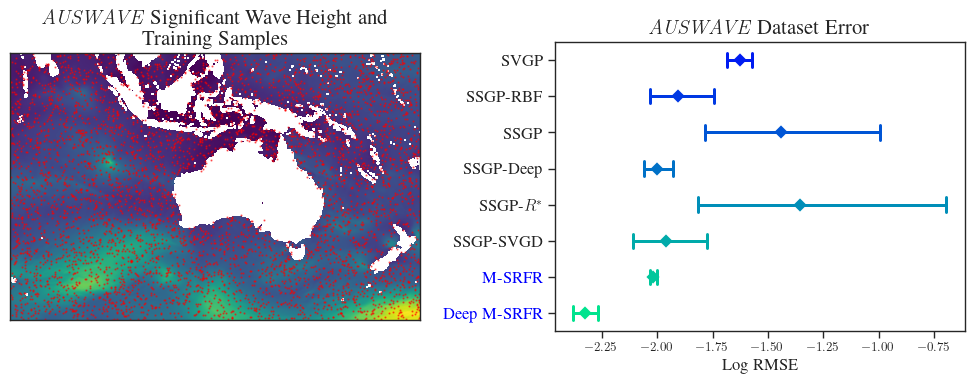

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

unique_models = ocean_res["model"].unique()
colors = sns.color_palette("hls", len(unique_models))

ax[0].imshow(sig_wave, cmap='viridis')
ax[0].scatter(samples[:, 1], samples[:, 0], s=0.6, c='red', alpha=0.5)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("$\\it{AUSWAVE}$ Significant Wave Height and \n Training Samples")

pointplot = sns.pointplot(
    data=ocean_res, x="log_rmse", y="model", hue="model",
    errorbar="ci", capsize=.4,
    legend=False, palette="winter", color=".5", #color="black",
    linestyle="none", marker="D", ax=ax[1]
)
for i, label in enumerate(pointplot.get_yticklabels()):
    label.set_fontsize(12)
    if i == len(names) - 1 or i == len(names) - 2:
        label.set_color('blue')

plt.xlabel("Log RMSE")
plt.ylabel("")
plt.tight_layout()
pointplot.set_title("$\\it{AUSWAVE}$ Dataset Error")
plt.tight_layout()
plt.show()
fig.savefig("ocean.pdf", format="pdf", bbox_inches="tight", dpi=300)

## SVGD GMM Example

In [32]:
# set python to pick up local directory
from pathlib import Path
import sys
import os
path_root = str(Path(os.getcwd()).parents[0])
package_root = str(Path(os.getcwd()).parents[1])
sys.path.append(path_root)
sys.path.append(package_root)

In [33]:
import jax
import jax.numpy as jnp
from jax import vmap, jit
from tensorflow_probability.substrates.jax import distributions as tfd

In [34]:
from steinRF.stein.svgd import svgd
from steinRF.stein.targets import TFTarget, GMMTarget

In [121]:
from jax.scipy.stats import norm
import optax

def simple_vi(X, epochs, lr):
    def log_prob_single_gaussian(params):
        mean, log_std = params
        return jnp.sum(norm.logpdf(X, mean, jnp.exp(log_std)))

    # Variational objective (negative ELBO)
    def objective(params):
        return -log_prob_single_gaussian(params)

    # 3. VI Implementation
    opt = optax.adam(learning_rate=lr)
    
    @jit
    def update(params, opt_state):
        grads = jax.grad(objective)(params)
        updates, opt_state = opt.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state
    
    # Optimization loop
    params = (jnp.ones(2), jnp.zeros(2))
    opt_state = opt.init(params)
    for i in range(epochs):
        params, opt_state = update(params, opt_state)

    return tfd.Normal(loc=params[0], scale=jnp.exp(params[1]))

In [181]:
KEY = jax.random.PRNGKey(2024)
bound = 5
lb, ub = -bound, bound
n_per_dim = 100
mu_loc = 2.5
sd = 0.7
sds = jnp.ones((4, 2)) * sd

# mixture model target
w = tfd.Categorical(probs=[0.25, 0.25, 0.25, 0.25])
gs_mu = jnp.array([[-mu_loc, -mu_loc], [mu_loc, mu_loc], [mu_loc, -mu_loc], [-mu_loc, mu_loc]])
gs = tfd.MultivariateNormalDiag(loc=gs_mu, scale_diag=sds)
gmm = tfd.MixtureSameFamily(w, gs)
target = TFTarget(gmm)

# data
X1_grid, X2_grid = jnp.meshgrid(jnp.linspace(lb, ub, n_per_dim), jnp.linspace(lb, ub, n_per_dim))
X_grid = jnp.concatenate([X1_grid[:, :, None], X2_grid[:, :, None]], axis=-1)
X = X_grid.reshape(-1, 2)
y = gmm.prob(X)
y_grid = y.reshape(n_per_dim, n_per_dim)

In [182]:
epochs = 1000
lr = 1e-1
s = 0
R = 200

w_mc = gmm.sample(R, seed=KEY)

# vi
vi_dist = simple_vi(X, epochs, lr)
w_vi = vi_dist.sample(R, seed=KEY)

# svgd
w_init = jax.random.uniform(KEY, (R, 2), minval=lb, maxval=ub)
w_svgd, svgd_losses = svgd(w_init, target, epochs, lr=lr, s=s)

(-5.0, 5.0)

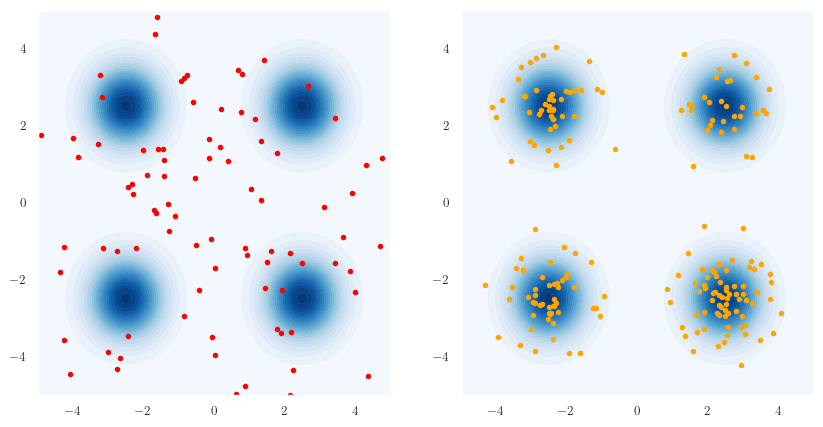

In [196]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

n_vi = 100


ax[0].contourf(X1_grid, X2_grid, y_grid, cmap="Blues", levels=20)
ax[0].scatter(w_vi[:n_vi, 0], w_vi[:n_vi, 1], s=10, label="VI", color="red")
ax[1].contourf(X1_grid, X2_grid, y_grid, cmap="Blues", levels=20)
ax[1].scatter(w_svgd[:, 0], w_svgd[:, 1], s=10, label="SVGD", color="orange")
ax[0].set_xlim(lb,  ub)
ax[0].set_ylim(lb,  ub)

## M-SRFR Predictions

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from steinRF.gp.models import build_train_mix_rff

In [232]:
airfoil = pd.read_csv("../airfoil/airfoil.csv")
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()
airfoil[
    ['frequency', 'angle', 'chord_length', 'velocity', 'thickness']
] = X_scaler.fit_transform(airfoil.drop(columns=["sound_pressure"]))
airfoil['sound_pressure'] = y_scaler.fit_transform(airfoil[['sound_pressure']])
# airfoil = pd.DataFrame(scaler.fit_transform(airfoil))
# airfoil.columns = ['frequency', 'angle', 'chord_length', 'velocity', 'thickness', 'sound_pressure']

X = jnp.array(airfoil.drop(columns=['sound_pressure']))
y = jnp.array(airfoil['sound_pressure'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=int(key[0]))
X_train, X_val, y_train, y_val = jnp.array(X_train), jnp.array(X_val), jnp.array(y_train), jnp.array(y_val)
d = X_train.shape[1]

In [233]:
mix_params = {
        'diag': 0.004082285639051628, 'lr': 0.14002311333326806, 'lr_gd': 0.29379290342643566, 'alpha': 1.6, 'q': 6, 's': 2,
        'epochs': 1000, 'from_data': False, 'gd_params': lambda t: [t.kernel.transform.scale], 'init_ls': True,
        'prior': TFTarget(tfd.Normal(jnp.zeros(d), jnp.ones(d) * 3))
}

mix_rff, _ = build_train_mix_rff(jax.random.PRNGKey(0), X_train, y_train, R=100, **mix_params)

In [234]:
mix_rff_preds = mix_rff.multi_condition(y_train, X_val, diag=mix_params["diag"])[0]
mix_rff_mu = jnp.mean(mix_rff_preds, axis=0)
mix_rff_std = jnp.std(mix_rff_preds, axis=0)

<Axes: ylabel='Density'>

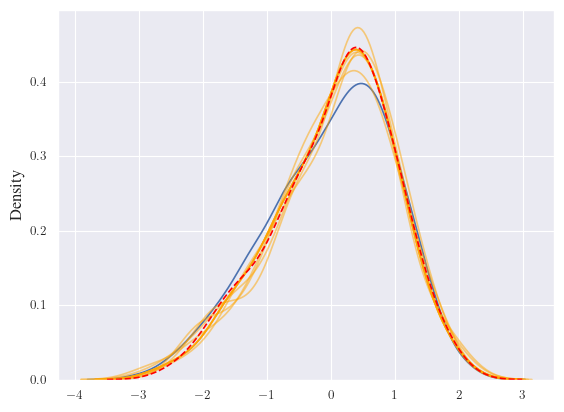

In [235]:
sns.kdeplot(y)

for i in range(10):
    sns.kdeplot(mix_rff_preds[i], alpha=0.5, color="orange")

sns.kdeplot(mix_rff_mu, color="red", linestyle="--")